## AMV E-COMMERCE

**1: Definicion de librerias**

In [28]:
import numpy as np
import matplotlib.pylab as plt
from math import exp,log,sqrt,pi,sin
import scipy.stats as sts
import pandas as pd
%matplotlib inline
import re

**2: Importacion de datos y limpieza**

In [29]:
ruta = 'C:/Users/1063949520/Marcos/Datos AMV/'
nombre='data.csv'
df = pd.read_csv(ruta+nombre,encoding="iso-8859-1",dtype={'CustomerID':str}).reset_index(drop=True)

In [30]:
df.shape

(541909, 8)

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [32]:
df.describe(percentiles=[0.01,0.02,0.05,0.95,0.999])

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
1%,-2.000000,0.190000
2%,1.000000,0.290000
5%,1.000000,0.420000
50%,3.000000,2.080000
95%,29.000000,9.950000
99.9%,468.920000,205.559800


In [33]:
df.loc[(df['Quantity']==-80995)| (df['Quantity']==80995)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446,United Kingdom


In [34]:
df.loc[(df['Quantity']<0) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


**2.1 Duplicate Values**

In [35]:
df.duplicated().sum()

5268

In [36]:
duplicates = df[df.duplicated(keep=False)]

In [37]:
duplicates.loc[(duplicates['InvoiceNo']=='536409')].sort_values('StockCode',ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908,United Kingdom


In [38]:
df.drop_duplicates(keep="first",inplace=True) 

In [39]:
df.loc[(df['InvoiceNo']=='536409') & (df['StockCode']=='22900')].sort_values('StockCode',ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908,United Kingdom


In [40]:
df.duplicated().sum()

0

**2.2 Missing Values**

In [41]:
Missings=df.isnull().sum()

In [42]:
Missings/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [43]:
var=['InvoiceNo','CustomerID']
X=df[var].copy()
X=X.drop_duplicates()

In [44]:
X.shape

(25900, 2)

In [45]:
MissingsX=X.isnull().sum()
MissingsX/X.shape[0]*100

InvoiceNo      0.000000
CustomerID    14.324324
dtype: float64

In [46]:
X=X.rename(columns={"CustomerID": "CustomerID_DIS"})

In [47]:
df=df.merge(X, left_on='InvoiceNo', right_on='InvoiceNo')

In [48]:
Missings=df.isnull().sum()
Missings/df.shape[0]*100

InvoiceNo          0.000000
StockCode          0.000000
Description        0.270945
Quantity           0.000000
InvoiceDate        0.000000
UnitPrice          0.000000
CustomerID        25.163377
Country            0.000000
CustomerID_DIS    25.163377
dtype: float64

In [19]:
df = df[~df['CustomerID'].isnull()]

In [20]:
df.shape

(401604, 9)

In [21]:
df.shape[0]/541909

0.7410912164219454

**2.2.1 CONSOLIDACION**

In [83]:
pd.DataFrame([{df['CustomerID'].nunique(),len(df.groupby(["CustomerID", "InvoiceNo"], as_index=False).count())}],columns=['Clientes','Compras'],index=['Total'])

,Clientes,Compras
Total,4372,22190


**2.3 Filtros**

In [22]:
df = df.loc[(df['Quantity']<=500)&(df['Quantity']>=1)]

In [23]:
df.shape[0]/541909

0.7239684153612507

In [24]:
df.describe(percentiles=[0.01,0.02,0.05,0.95,0.999])

,Quantity,UnitPrice
count,392325.000000,392325.00000
mean,11.784362,3.12770
std,25.798899,22.25213
min,1.000000,0.00000
1%,1.000000,0.21000
2%,1.000000,0.29000
5%,1.000000,0.42000
50%,6.000000,1.95000
95%,36.000000,8.50000
99.9%,336.000000,49.95000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229DFB5F288>,
      dtype=object)

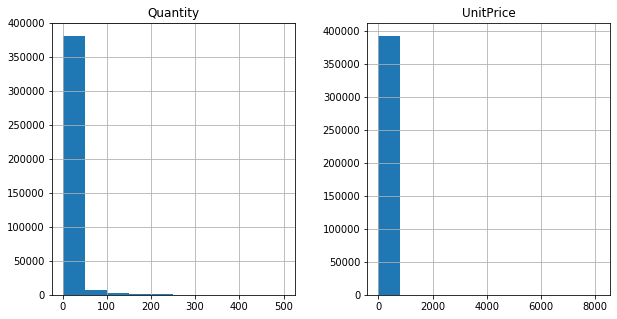

In [25]:
df.hist(figsize=(10,5))

In [23]:
var=['Description']
X=df[var].copy()
X=X.drop_duplicates()

In [24]:
pd.set_option('display.max_rows',15|0)

In [25]:
X

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
535327,????damages????
535329,mixed up
535335,lost
537621,CREAM HANGING HEART T-LIGHT HOLDER


In [43]:
df['order_canceled'] = df['InvoiceNo'].apply(lambda x:int('C' in x))
display(df[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_DIS,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,17850,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,17850,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,17850,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,17850,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,17850,0


In [ ]:
BANK CHARGES	Bank Chargesb

In [45]:
df.loc[(df['order_canceled']>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_DIS,order_canceled


In [47]:
df.order_canceled.sum()

0